In [1]:
import scipy as sp 
from scipy import io
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
data = io.loadmat("amp_data.mat")


In [3]:
data['amp_data']

array([[ 0.00000000e+00],
       [-3.05175781e-05],
       [ 6.10351562e-05],
       ...,
       [ 9.15527344e-05],
       [-3.05175781e-05],
       [ 0.00000000e+00]])

In [4]:
data= data['amp_data']

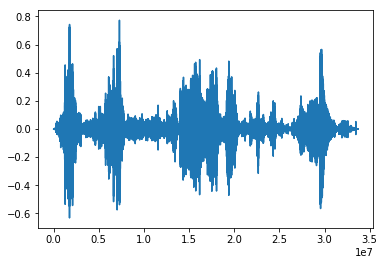

In [5]:
plt.plot(data)

In [6]:
data.shape

(33713280, 1)

[]

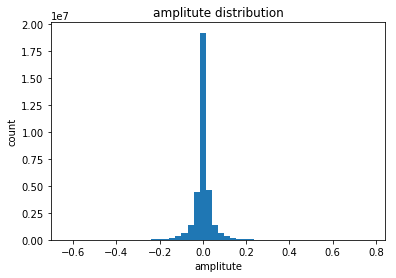

In [104]:
plt.hist(data,bins=50)
plt.ylabel("count")
plt.title("amplitute distribution")
plt.xlabel("amplitute")
plt.plot()
plt.plot()

[]

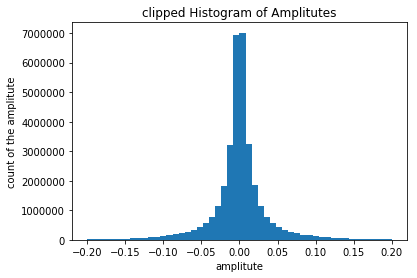

In [106]:
#data_clipped=np.sort(data)[int(data.shape[0]*0.25):int(data.shape[0]*0.75)]
data_copy=np.array(data)
data_clipped=data_copy[data_copy>-0.2]

data_clipped=data_clipped[data_clipped<0.2]
plt.figure()
#plt.figure(figsize=(10,8))
plt.hist(data_clipped,bins=50)
plt.ylabel("count of the amplitute")
plt.title("clipped Histogram of Amplitutes")
plt.xlabel("amplitute")
plt.plot()

In [8]:
pd_data= pd.DataFrame(data)

In [9]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33713280 entries, 0 to 33713279
Data columns (total 1 columns):
0    float64
dtypes: float64(1)
memory usage: 257.2 MB


In [10]:
pd_data.describe()

,0
count,3.371328e+07
mean,-1.586184e-05
std,4.153176e-02
min,-6.327820e-01
25%,-1.095581e-02
50%,0.000000e+00
75%,1.107788e-02
max,7.725220e-01


In [11]:
# assumping the input has been read from the mat and the data column has been extracted from the dictionary
def preprocess(data):
    max_index= data.shape[0]//21*21     #reshape the data so that it can be divivded by 21
    clipped_data=data[ : max_index].reshape(-1,21)
    #random shuffle and splitting into training validation and testing dataset
    np.random.seed(10) 
    np.random.shuffle(clipped_data)
    train,testandval=train_test_split(clipped_data,test_size=0.3,train_size=0.7,random_state=10,shuffle=False)
    val,test= train_test_split(testandval,test_size=0.5,train_size=0.5,random_state=10,shuffle=False)
    X_shuf_train=train[:,:20]

    y_shuf_train=train[:,-1]

    X_shuf_val=val[:,:20]

    y_shuf_val=val[:,-1]

    X_shuf_test=test[:,:20]

    y_shuf_test=test[:,-1]
    return X_shuf_train,y_shuf_train,X_shuf_val,y_shuf_val,X_shuf_test,y_shuf_test

In [12]:
X_shuf_train,y_shuf_train,X_shuf_val,y_shuf_val,X_shuf_test,y_shuf_test= preprocess(data)

In [13]:
X_shuf_train.shape

(1123775, 20)

In [14]:
y_train= X_shuf_train[0]    #first training sample
x_train=np.arange(0,1,0.05) 
x_train=x_train[:,None]
y_train=y_train[:,None]
y_test=y_shuf_train[0]
#np.linalg.lstsq(x_train,y_train) # solution of weight  


In [21]:
x_trainandtest=np.append(x_train,[1])
extended_x_trainandtest=np.array([[1,x,x**2,x**3,x**4] for x in x_trainandtest])
extended_biased_x_trainandtest = np.concatenate([extended_x_trainandtest, np.ones((extended_x_trainandtest.shape[0],1))], axis=1)

In [16]:
X_bias = np.concatenate([x_train, np.ones((x_train.shape[0],1))], axis=1)
w1,b1=np.linalg.lstsq(X_bias,y_train)[0]
y_pred_1=w1+b1

/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [17]:
extend_basis= lambda t: [1,t,t**2,t**3,t**4]
extended_x=np.array([[1,x,x**2,x**3,x**4] for x in x_train])
extended_biased_X = np.concatenate([extended_x, np.ones((x_train.shape[0],1))], axis=1)
w=np.linalg.lstsq(extended_biased_X,y_train)[0]
extended_y=np.array(extend_basis(1))[None,:]
extended_biased_y=np.concatenate([extended_y, np.ones((extended_y.shape[0],1))], axis=1)
y_pred_2 = np.dot(extended_biased_y,w)[0,0]

/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


Text(0.5,1,'linear and quadratic fit to selected sample')

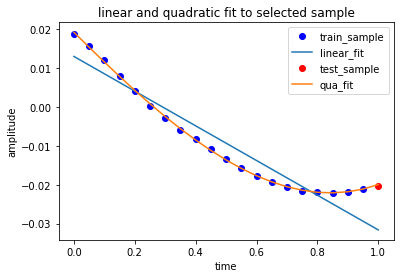

In [24]:
plt.figure()
train_sample,=plt.plot(x_train,y_train,'bo')
linear_fit,=plt.plot(x_trainandtest,w1*x_trainandtest+b1)
test_sample,=plt.plot(1,y_test,'ro')
qua_fit,=plt.plot(x_trainandtest,np.matmul(extended_biased_x_trainandtest,w))
plt.legend([train_sample,linear_fit,test_sample,qua_fit],['train_sample','linear_fit','test_sample','qua_fit'],loc='best')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("linear and quadratic fit to selected sample")

In [20]:
def make_vv(C,K):
    phi = Phi(C,K)
    phi_tanspose = phi
    phi_tanspose = phi_tanspose.transpose()
    temp = phi_tanspose.dot(phi)
    temp = np.linalg.inv(temp)
    temp = temp.transpose()
    temp = phi.dot(temp)
    phi_t1 =np.ones(K)
    temp = temp.dot(phi_t1)
    temp = temp.transpose()
    return temp


In [ ]:
def poly_predict(K,y_trian):
    v_tanspose = make_vv(y_train.size,K)
    v_tanspose = v_tanspose.transpose()
    v_tanspose = v_tanspose.dot(y_trian)
    return v_tanspose.item(0,0)

In [ ]:
def poly_predict_batch(C,K,y_train):
    v_tanspose = make_vv(C,K)
    v_tanspose = v_tanspose.transpose()
    train_data = y_train[:,-C:]
    train_data = train_data.transpose()
    result = v_tanspose.dot(train_data)
    return result.transpose().A1

In [ ]:
c = bestC
k = bestK
predicts = poly_predict_batch(c,k,X_shuf_val)
total_error = np.sum(np.square(y_shuf_val - predicts))
mean_error = np.mean(np.square(y_shuf_val - predicts))
print("On Dev:")
print("C is: " + str(c))
print("K is: " + str(k))
print("Mean Error: " + str(mean_error))
print("Total Error: " + str(total_error))


predicts = poly_predict_batch(c,k,X_shuf_test)
total_error = np.sum(np.square(y_shuf_test - predicts))
mean_error = np.mean(np.square(y_shuf_test - predicts))
print("On Test:")
print("C is: " + str(c))
print("K is: " + str(k))
print("Mean Error: " + str(mean_error))
print("Total Error: " + str(total_error))

In [ ]:
Mean Error: 0.6836516627113578
Total Error: 768270.6472634561
1.3423977471406233e-05
15.08553028292954
2 4

In [ ]:
C = 20
K = 5
bestC = 0
bestK = 0;
bestMean = 10000;
bestTotal = 0;
for c in range(1,21):
    for k in range(1,21):
        predicts = poly_predict_batch(c,k,X_shuf_train)
        total_error = np.sum(np.square(y_shuf_train - predicts))
        mean_error = np.mean(np.square(y_shuf_train - predicts))
        print("C is: " + str(c))
        print("K is: " + str(k))
        print("Mean Error: " + str(mean_error))
        print("Total Error: " + str(total_error))
        if(bestMean >= mean_error):
            bestMean =mean_error
            bestTotal = total_error
            bestC= c
            bestK=k
            
print(bestMean)
print(bestTotal)
print(bestC,bestK)

In [ ]:
On Dev:
C is: 2
K is: 4
Mean Error: 1.369980874153201e-05
Total Error: 3.2990372432395816
On Test:
C is: 2
K is: 4
Mean Error: 1.3843913337935206e-05
Total Error: 3.333752770908177

In [45]:
X_shuf_train.shape[0]

1123775

In [51]:
#q4a assumes X_shuf_train exists
best_loss=1000
best_c=0
def fit_data(C):
    x_train=X_shuf_train[:,-C:]
    y_train=y_shuf_train
    
    #,X_shuf_test,y_shuf_test
    biased_x_train = np.concatenate([x_train, np.ones((x_train.shape[0],1))], axis=1)
    linear_fit=np.linalg.lstsq(biased_x_train,y_train)
    w=linear_fit[0]
    loss= linear_fit[1]
    return w,loss
for C in range(1,21):
    print("using {} previous timestamps".format(C))
    w,train_loss= fit_data(C)
    x_val,y_val=X_shuf_val[:,-C:],y_shuf_val
    biased_x_val = np.concatenate([x_val, np.ones((x_val.shape[0],1))], axis=1)
    val_loss=np.square(y_val-np.matmul(biased_x_val,w)).mean()
    if val_loss<best_loss :
        best_c=c
        best_loss=val_loss
        best_w =w
    print("training loss is {}".format(train_loss/X_shuf_train.shape[0]))
    print("val loss is {}\n".format(val_loss))

using 1 previous timestamps
training loss is [3.66881519e-05]
val loss is 3.684507457070041e-05

using 2 previous timestamps
training loss is [1.1526311e-05]
val loss is 1.18444341368729e-05

using 3 previous timestamps


/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


training loss is [9.82618613e-06]
val loss is 1.003460068311717e-05

using 4 previous timestamps
training loss is [9.49970894e-06]
val loss is 9.618642907248963e-06

using 5 previous timestamps
training loss is [9.04746758e-06]
val loss is 9.147240050193521e-06

using 6 previous timestamps
training loss is [8.85702699e-06]
val loss is 8.937329278386288e-06

using 7 previous timestamps
training loss is [8.36342937e-06]
val loss is 8.423199373885928e-06

using 8 previous timestamps
training loss is [8.12500597e-06]
val loss is 8.288207725523193e-06

using 9 previous timestamps
training loss is [8.05619341e-06]
val loss is 8.235476317253492e-06

using 10 previous timestamps
training loss is [7.96105937e-06]
val loss is 8.119770417654983e-06

using 11 previous timestamps
training loss is [7.89967666e-06]
val loss is 8.086567940384451e-06

using 12 previous timestamps
training loss is [7.84166298e-06]
val loss is 8.072183673213144e-06

using 13 previous timestamps
training loss is [7.788106

In [ ]:
best_c

In [53]:
#q4b
best_C=18
x_test_q4,y_test=X_shuf_test[:,-best_C:],y_shuf_test
biased_x_test = np.concatenate([x_test_q4, np.ones((x_test_q4.shape[0],1))], axis=1)
test_loss=np.square(y_test-np.matmul(biased_x_test,best_w)).mean()
test_loss

7.489541691960743e-06

In [78]:
#q4c
x_val_q4,y_val_q4=X_shuf_val[:,-best_C:],y_shuf_val
biased_x_val_q4 = np.concatenate([x_val_q4, np.ones((x_val_q4.shape[0],1))], axis=1)
val_residual=y_val_q4-np.matmul(biased_x_val_q4,best_w) #N*1




[]

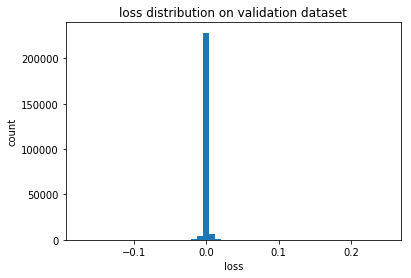

In [82]:


plt.figure()
plt.hist(val_residual,bins=50)
plt.ylabel("count")
plt.title("loss distribution on validation dataset")
plt.xlabel("loss")
plt.plot()

[]

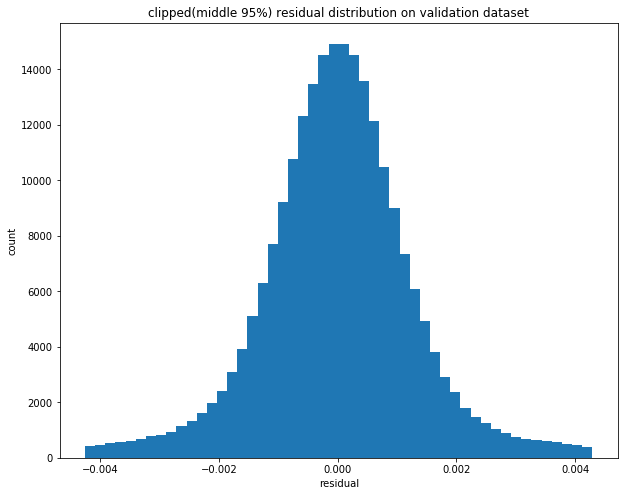

In [90]:
val_residual_clipped=np.sort(val_residual)[int(val_loss.shape[0]*0.025):int(val_loss.shape[0]*0.975)]
plt.figure(figsize=(10,8))
plt.hist(val_residual_clipped,bins=50)
plt.ylabel("count")
plt.title("clipped(middle 95%) residual distribution on validation dataset")
plt.xlabel("residual")
plt.plot()